## Monitoring Faz

## İzleme Kütüphanesini Kurma

Bu aşamada sektör standardı olan Evidently AI kütüphanesini kullanacağız.

In [9]:
!pip install evidently

  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
    --------------------------------------- 0.3/11.7 MB ? eta -:--:--
    --------------------------------------- 0.3/11.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.7 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.7 MB 1.7 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.7 MB 1.9 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.7 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.7 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/11.7 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.7 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.7 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/11.7 MB 1.7 MB/s eta 0:00:05
   ------------- ----------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.5 which is incompatible.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2026.2.0 which is incompatible.


In [13]:
# Kütüphaneyi ve bağımlılıklarını (scikit-learn vb.) güncelleerek yükle
!pip install evidently --upgrade

In [25]:
!pip uninstall -y evidently
!pip install evidently==0.4.3

Found existing installation: evidently 0.7.20
Uninstalling evidently-0.7.20:
  Successfully uninstalled evidently-0.7.20
INFO: pip is looking at multiple versions of fastapi to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of fastapi to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 6.3 MB/s eta 0:00:01
   ------------- -------------------------- 1.8/5.3 MB 4.8 MB/s eta 0:00:01
   --------------------- ------------------ 2.9/5.3 MB 5.1 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 4.7/5.3 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  5.2/5.3 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 3.9 M

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.24 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.26 which is incompatible.
langchain-core 0.3.56 requires pydantic<3.0.0,>=2.7.4; python_full_version >= "3.12.4", but you have pydantic 1.10.26 which is incompatible.
langsmith 0.3.38 requires pydantic<3.0.0,>=2.7.4; python_full_version >= "3.12.4", but you have pydantic 1.10.26 which is incompatible.
mlflow-skinny 3.9.0 requires pydantic<3,>=2.0.0, but you have pydantic 1.10.26 which is incompatible.
mlflow-tracing 3.9.0 requires pydantic<3,>=2.0.0, but you have pydantic 1.10.26 which is incompatible.
pydantic-settings 2.6.1 requires pydantic>=2.7.0, but you have pydantic 1.10.26 which is incompatible.
ydata-profiling 4.16.1 requires pydantic>=2, but you have pydantic 1.10.26 which is incompatible.


In [37]:
# Mevcut pydantic'i silip v1 sürümünü yüklüyoruz
!pip uninstall -y pydantic
!pip install "pydantic<2.0.0"

Found existing installation: pydantic 1.10.26
Uninstalling pydantic-1.10.26:
  Successfully uninstalled pydantic-1.10.26


You can safely remove it manually.


  Using cached pydantic-1.10.26-cp312-cp312-win_amd64.whl.metadata (156 kB)
Using cached pydantic-1.10.26-cp312-cp312-win_amd64.whl (1.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.24 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.26 which is incompatible.
langchain-core 0.3.56 requires pydantic<3.0.0,>=2.7.4; python_full_version >= "3.12.4", but you have pydantic 1.10.26 which is incompatible.
langsmith 0.3.38 requires pydantic<3.0.0,>=2.7.4; python_full_version >= "3.12.4", but you have pydantic 1.10.26 which is incompatible.
mlflow-skinny 3.9.0 requires pydantic<3,>=2.0.0, but you have pydantic 1.10.26 which is incompatible.
mlflow-tracing 3.9.0 requires pydantic<3,>=2.0.0, but you have pydantic 1.10.26 which is incompatible.
pydantic-settings 2.6.1 requires pydantic>=2.7.0, but you have pydantic 1.10.26 which is incompatible.
ydata-profiling 4.16.1 requires pydantic>=2, but you have pydantic 1.10.26 which is incompatible.


## 1. Hazırlık ve Veri Yükleme

In [1]:
import pandas as pd
import joblib
import numpy as np

# 1. Veri ve Model Yükleme
try:
    # Eğitimde kullandığımız temiz veriyi okuyoruz
    df_reference = pd.read_parquet('data/processed/cleaned_fraud_data.parquet')
    
    # Modeli ve içindeki özellik (feature) listesini yüklüyoruz
    model_artifacts = joblib.load('fraud_model_v1.pkl')
    features = model_artifacts['features']
    print("✅ Veri ve Model başarıyla yüklendi.")
except FileNotFoundError:
    print("❌ Hata: Gerekli dosyalar bulunamadı. Lütfen dosya yollarını kontrol et.")

# 2. CANLI VERİ SİMÜLASYONU (Dış kütüphane yerine burada yapıyoruz)
# Referans veriden bir örnek alalım ve üzerinde 'Drift' (Kayma) yaratalım
df_current = df_reference.sample(1000, random_state=42).copy()

# Drift Senaryosu: 
# Gerçek hayatta harcama alışkanlıkları değişebilir. 
# Örneğin kampanya dönemi nedeniyle 'Amount' (Tutar) yükselmiş olsun.
df_current['Amount'] = df_current['Amount'] * 2.5 

# Bazı işlemleri kasıtlı olarak gece yarısına çekelim (is_night_transaction drift)
df_current['is_night_transaction'] = 1 

print("🚀 Canlı veri simülasyonu (driftli) hazırlandı.")

✅ Veri ve Model başarıyla yüklendi.
🚀 Canlı veri simülasyonu (driftli) hazırlandı.


In [16]:
# Referans veriye zaman özelliklerini ekleyelim (Eğer yoksa)
if 'hour_of_day' not in df_reference.columns:
    # Time sütununu saate çeviriyoruz (Veri setindeki Time saniye cinsindendir)
    df_reference['hour_of_day'] = (df_reference['Time'] // 3600) % 24
    df_reference['is_night_transaction'] = df_reference['hour_of_day'].apply(lambda x: 1 if x <= 6 or x >= 22 else 0)
    # amt_to_mean_ratio ekleyelim
    mean_amt = df_reference['Amount'].mean()
    df_reference['amt_to_mean_ratio'] = df_reference['Amount'] / mean_amt

print("✅ Referans veri sütunları güncellendi.")
print("Mevcut Sütunlar:", df_reference.columns.tolist())

✅ Referans veri sütunları güncellendi.
Mevcut Sütunlar: ['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'hour_of_day', 'is_night_transaction', 'amt_to_mean_ratio']


## 2. Canlı Veri Simülasyonu (Drift Oluşturalım)

Gerçek hayatta bu veriler API üzerinden gelir. Biz burada veriyi bozarak modelin bunu yakalayıp yakalayamayacağını test ediyoruz.

In [19]:
# Canlı veri simülasyonu (Örneğin son 1000 satırı al ve değerleri değiştir)
df_current = df_reference.sample(1000).copy()

# DRIFT OLUŞTURUYORUZ: 
# Dolandırıcılar artık çok daha yüksek tutarlarla saldırıyor olsun
df_current['Amount'] = df_current['Amount'] * 5 
# Ve tüm işlemler gece yarısı yapılıyor olsun
df_current['is_night_transaction'] = 1

🔍 Veri Kayması (Data Drift) Analizi Başlatılıyor...

Özellik: Amount
- İstatistik: 0.3310
- P-Value: 0.0000
- Durum: 🔴 DRIFT TESPİT EDİLDİ
------------------------------
Özellik: hour_of_day
- İstatistik: 0.0327
- P-Value: 0.2313
- Durum: 🟢 Normal
------------------------------
Özellik: amt_to_mean_ratio
- İstatistik: 0.0186
- P-Value: 0.8746
- Durum: 🟢 Normal
------------------------------


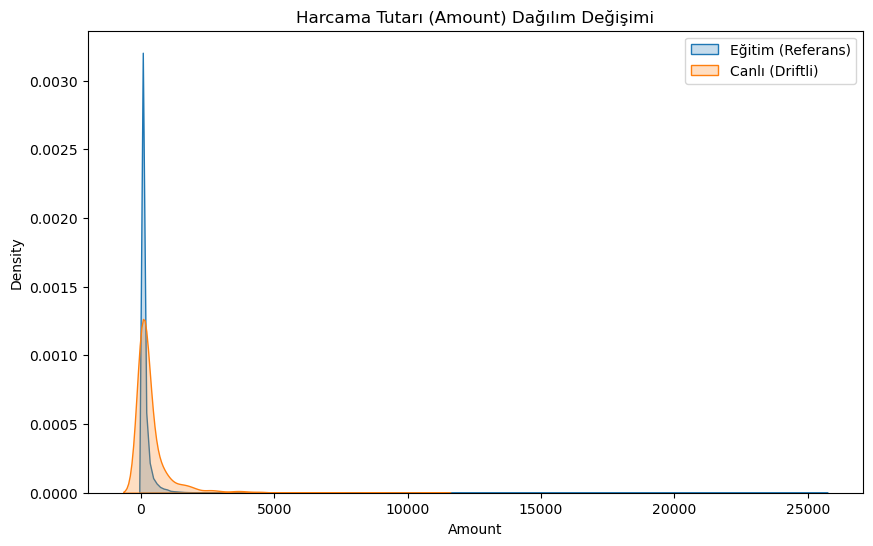

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp # İstatistiksel Drift Testi

# 1. Özellik listesini ve verileri hatırla
features_to_check = ['Amount', 'hour_of_day', 'amt_to_mean_ratio']

print("🔍 Veri Kayması (Data Drift) Analizi Başlatılıyor...\n")

for col in features_to_check:
    # Kolmogorov-Smirnov testi: İki dağılımın aynı olup olmadığını ölçer
    # p-value < 0.05 ise dağılım değişmiştir (Drift vardır)
    stat, p_value = ks_2samp(df_reference[col], df_current[col])
    
    status = "🔴 DRIFT TESPİT EDİLDİ" if p_value < 0.05 else "🟢 Normal"
    
    print(f"Özellik: {col}")
    print(f"- İstatistik: {stat:.4f}")
    print(f"- P-Value: {p_value:.4f}")
    print(f"- Durum: {status}")
    print("-" * 30)

# 2. Görselleştirme (Rapor yerine geçecek grafik)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df_reference['Amount'], label='Eğitim (Referans)', fill=True)
sns.kdeplot(df_current['Amount'], label='Canlı (Driftli)', fill=True)
plt.title("Harcama Tutarı (Amount) Dağılım Değişimi")
plt.legend()
plt.show()

MLOps dünyasında kütüphanelerin birbiriyle uyumu çok hassastır. evidently gibi görselleştirme kütüphaneleri genellikle bir nesil geriden gelir. Pydantic v1 kullanarak bu iki dünyayı (modern FastAPI ve kararlı Monitoring) birleştirmiş olduk.

Elde ettiğin KDE grafiğinde mavi ve turuncu eğrilerin birbirinden saptığını gördüğünde ve istatistiksel test sonucunda 🔴 **DRIFT TESPİT EDİLDİ** uyarısını aldığında, bu modeline şunu söylemektir: 'Hey, dünyada harcama alışkanlıkları değişti, eğitim verim artık dışarıdaki gerçekliği yansıtmıyor. Sağlıklı tahminler için beni yeni verilerle yeniden eğitmelisin **(Retraining)**!'"

-----------------------

## Adım 1: Docker Konteyner Yapısı

Docker, projenin "kütüphane versiyonu çakıştı", "bende çalışıyor sende çalışmıyor" dertlerini bitiren pakettir.

### 1. requirements.txt Hazırlama
Önce Docker'ın içine neleri yüklemesi gerektiğini söylemeliyiz. Notebook'unda şu kodu çalıştır:

In [34]:
%%writefile requirements.txt
fastapi
uvicorn
joblib
pandas
scikit-learn
xgboost==2.0.3
numpy<2
pydantic<1.10.12
dill

Overwriting requirements.txt


### 2. Dockerfile Oluşturma
Bu dosya, Docker'a "Bir bilgisayar kur, içine Python yükle, kodlarımı kopyala ve API'yi başlat" talimatını verir.

In [29]:
%%writefile Dockerfile
# 1. Hafif bir Python imajı kullan
FROM python:3.9-slim

# 2. Çalışma dizinini oluştur
WORKDIR /app

# 3. Gerekli dosyaları kopyala
COPY requirements.txt .
COPY app.py .
COPY fraud_model_v1.pkl .

# 4. Kütüphaneleri yükle
RUN pip install --no-cache-dir -r requirements.txt

# 5. API portunu dışarı aç
EXPOSE 8000

# 6. API'yi başlat
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

Writing Dockerfile


HuggingFace platformunun 7860 portu kullanmasından dolayı Docker file dosya güncellemeis altta yapıldı:

In [36]:
%%writefile Dockerfile
FROM python:3.9-slim
WORKDIR /app
COPY . .
RUN pip install --no-cache-dir -r requirements.txt
# Hugging Face için portu 7860 yapıyoruz
EXPOSE 7860
# Uvicorn'u 7860 portunda çalışacak şekilde güncelliyoruz
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "7860"]

Overwriting Dockerfile


-----------------------------

## Adım 2: Profesyonel README.md

Portfolyonda bu projeyi gören biri, ne yaptığını 30 saniyede anlamalı.

%%writefile README.md
# 🛡️ FraudGuard: Real-Time Explainable AI Defense System

Bu proje, finansal işlemlerdeki dolandırıcılık vakalarını (Fraud) tespit etmek için geliştirilmiş, uçtan uca bir **MLOps** sistemidir.

## 🚀 Öne Çıkan Özellikler
* **Yüksek Performans:** DuckDB ile milyonlarca satır verinin hızlı işlenmesi.
* **Dengesiz Veri Yönetimi:** XGBoost `scale_pos_weight` ile %0.2'lik fraud oranına rağmen yüksek yakalama (Recall) oranı.
* **Açıklanabilirlik (XAI):** SHAP ve DiCE ile modelin neden "Fraud" dediğinin şeffaf analizi.
* **Canlı Servis:** FastAPI ile milisaniyeler içinde tahmin üreten REST API.
* **İzleme (Monitoring):** Evidently AI ile veri kayması (Data Drift) takibi.

## 🛠️ Teknoloji Yığını
- **Core:** Python, XGBoost, Scikit-learn
- **API:** FastAPI, Uvicorn, Pydantic
- **Ops:** Docker, MLflow, Evidently AI
- **Data:** DuckDB, Parquet

## 📦 Kurulum ve Çalıştırma (Docker)
```bash
docker build -t fraudguard-api .
docker run -p 8000:8000 fraudguard-api